In [1]:
import os

# 打開資料集，提取文字

In [106]:
files = os.listdir("./data")

In [107]:
texts = []
for file in files:
    with open(f"./data/{file}") as f:
        text = f.readlines()[0].lower()
        texts.append(text)

# 嘗試提取料的時間

In [108]:
import dateparser

In [109]:
times = []
locations = []
for file in files:
    time = file[-14:-4]
    
    if ord(time[0]) > 97:
        time = time[1:]
    location = file.replace(time, "").replace(".txt", "")
    locations.append(location)
        
    month = time[:3]
    day_year = time[3:].replace("_", " ")
    time = f"{month} {day_year}"
    
    print(dateparser.parse(time))
    times.append(dateparser.parse(time))

2019-09-09 00:00:00
2019-11-01 00:00:00
2019-08-15 00:00:00
2020-09-13 00:00:00
2020-09-21 00:00:00
2020-02-19 00:00:00
2019-12-19 00:00:00
2020-09-22 00:00:00
2019-09-23 00:00:00
2020-02-20 00:00:00
2020-09-03 00:00:00
2019-10-17 00:00:00
2020-01-30 00:00:00
2019-10-10 00:00:00
2020-08-18 00:00:00
2020-01-09 00:00:00
2020-03-02 00:00:00
2020-09-08 00:00:00
2020-06-20 00:00:00
2019-09-16 00:00:00
2019-12-10 00:00:00
2020-02-10 00:00:00
2020-02-21 00:00:00
2020-08-28 00:00:00
2020-09-12 00:00:00
2020-09-10 00:00:00
2020-02-28 00:00:00
2020-09-17 00:00:00
2020-01-14 00:00:00
2019-11-04 00:00:00
2020-09-18 00:00:00
2019-08-01 00:00:00
2020-09-19 00:00:00
2020-01-28 00:00:00
2019-07-17 00:00:00


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
times = np.array(times)
texts = np.array(texts)
df = pd.DataFrame()
df["Time"] = times
df["Text"] = texts
df["Location"] = locations

In [123]:
df = df.sort_values("Time")

# 尋找關鍵字並打印出來

In [144]:

def findKeyword(KeyWord):
    counts = []
    for text in df.Text:
        counts.append(text.count(KeyWord))
    df[KeyWord] = counts
    
def pltKeyword(KeyWord):
    plt.plot(df.Time, df[KeyWord])
    plt.title(f'mention "{KeyWord}"')
    plt.show()
    
def findAndPlotKeyword(keyWord):
    findKeyword(keyWord)
    pltKeyword(keyWord)

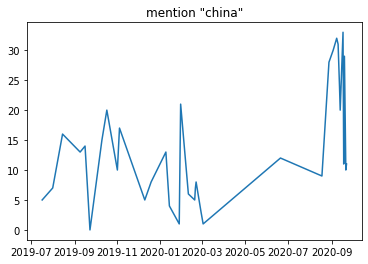

In [145]:
findAndPlotKeyword("china")

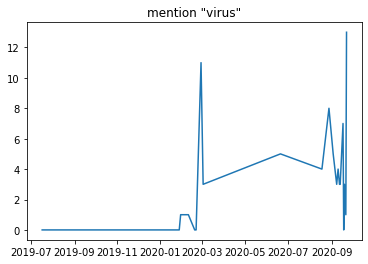

In [146]:
findAndPlotKeyword("virus")

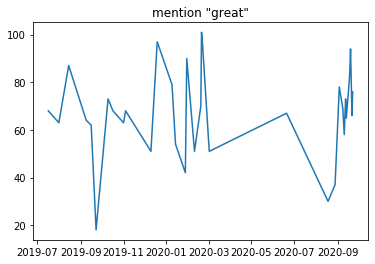

In [147]:
findAndPlotKeyword("great")

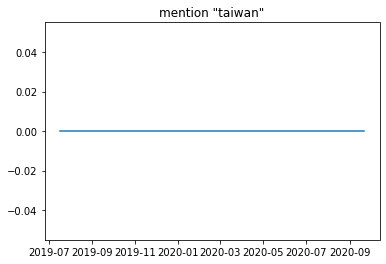

In [148]:
findAndPlotKeyword("taiwan")

In [131]:
df

,Time,Text,Location,china,virus,great,taiwan
34,2019-07-17,thank you very much. thank you. thank you. tha...,Greenville,5,0,68,0
31,2019-08-01,thank you all. thank you very much. thank you ...,Cincinnati,7,0,63,0
2,2019-08-15,thank you very much everybody. thank you. wow...,NewHampshire,16,0,87,0
0,2019-09-09,thank you everybody. thank you and vice presi...,Fayetteville,13,0,64,0
19,2019-09-16,"wow, thank you. thank you, new mexico. thank ...",NewMexico,14,0,62,0
8,2019-09-23,"hello, houston. i am so thrilled to be here in...",Texas,0,0,18,0
13,2019-10-10,"thank you very much. thank you, minnesota. thi...",Minneapolis,15,0,73,0
11,2019-10-17,thank you. thank you very much. hello dallas. ...,Dallas,20,0,68,0
1,2019-11-01,"ell, thank you very much. and hello, tupelo. t...",Tupelo,10,0,63,0
29,2019-11-04,thank you very much and thank you to the origi...,Lexington,17,0,68,0


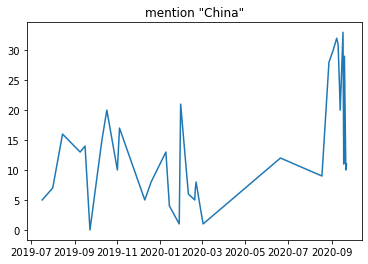

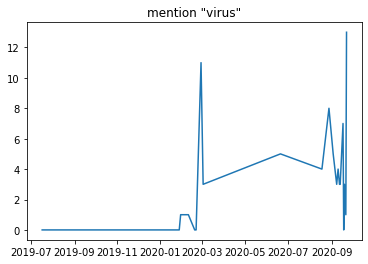

In [136]:
plt.plot(df.Time, df['virus'])
plt.title('mention "virus"')
plt.show()

In [26]:
file = "FreelandSep10_2020.txt"

In [34]:
with open(f"./data/{file}") as f:
    text = f.readlines()[0]
    print(file, text.count("China"))

FreelandSep10_2020.txt 31
